In [1]:
# KNN Classification
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [2]:
glass_data = pd.read_csv('glass.csv')

In [3]:
glass_data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
glass_data.shape

(214, 10)

In [5]:
glass_data.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [6]:
glass_data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [7]:
glass_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [8]:
glass_data.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

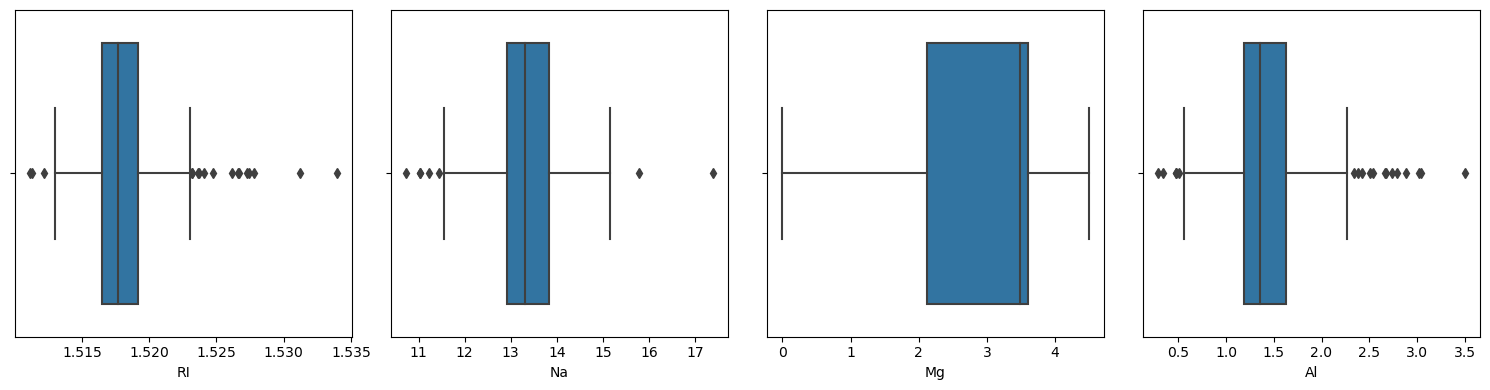

In [50]:
import warnings  # Importing the warnings module
warnings.filterwarnings("ignore")  # Ignoring all warnings


from matplotlib import pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(1, 4, figsize=(15,4))
sns.boxplot(x=glass_data.RI, ax=ax[0])

sns.boxplot(glass_data.Na, ax=ax[1])
sns.boxplot(glass_data.Mg, ax=ax[2])
sns.boxplot(glass_data.Al, ax=ax[3])


plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='Ca'>

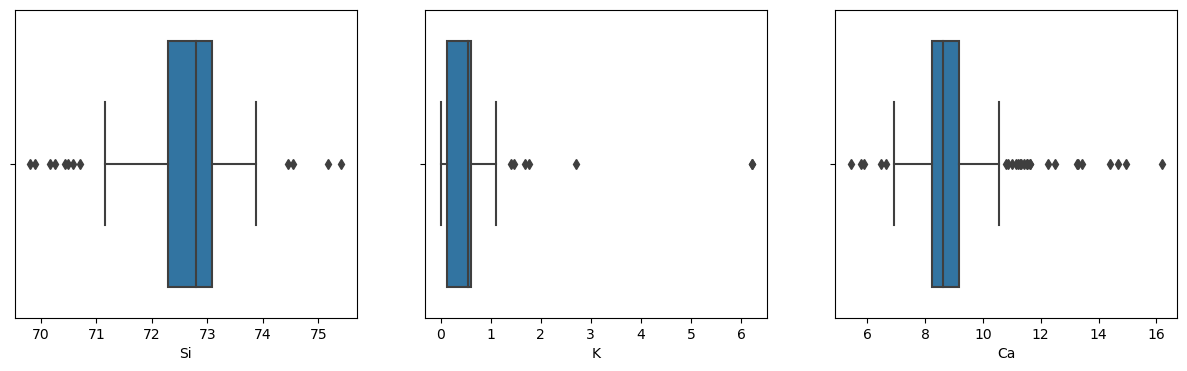

In [51]:
fig, ax = plt.subplots(1, 3, figsize=(15,4))
sns.boxplot(glass_data.Si, ax=ax[0])
sns.boxplot(glass_data.K, ax=ax[1])
sns.boxplot(glass_data.Ca, ax=ax[2])


<AxesSubplot:xlabel='Fe'>

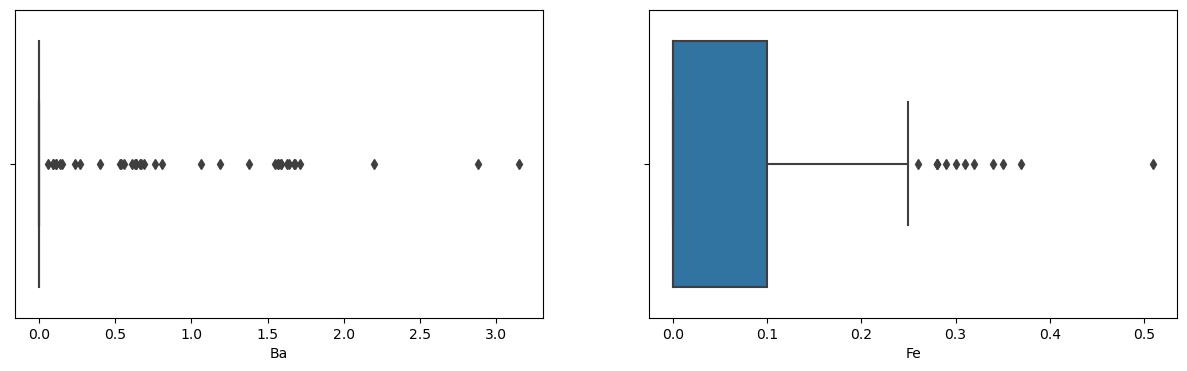

In [52]:
fig, ax = plt.subplots(1, 2, figsize=(15,4))
sns.boxplot(glass_data.Ba, ax=ax[0])
sns.boxplot(glass_data.Fe, ax=ax[1])

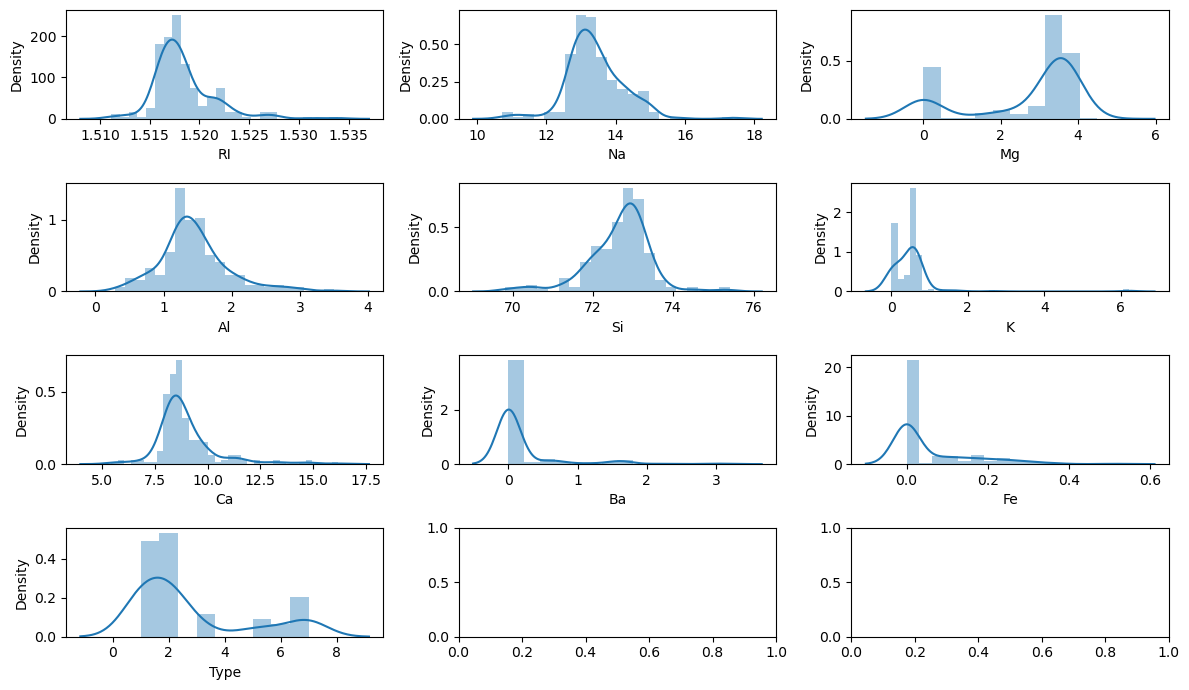

In [53]:
fig, ax = plt.subplots(4, 3, figsize=(12,7))
sns.distplot(glass_data.RI, ax=ax[0,0])
sns.distplot(glass_data.Na, ax=ax[0,1])
sns.distplot(glass_data.Mg, ax=ax[0,2])
sns.distplot(glass_data.Al, ax=ax[1,0])
sns.distplot(glass_data.Si, ax=ax[1,1])
sns.distplot(glass_data.K, ax=ax[1,2])
sns.distplot(glass_data.Ca, ax=ax[2,0])
sns.distplot(glass_data.Ba, ax=ax[2,1])
sns.distplot(glass_data. Fe, ax=ax[2,2])
sns.distplot(glass_data.Type, ax=ax[3,0])

plt.tight_layout()
plt.show()

In [54]:
glass_data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [55]:
from sklearn.preprocessing import power_transform
glass_data1 = glass_data[["RI","Na","Mg","Al","Si","K","Ca","Ba","Fe","Type"]].values
glass_data_transformed = power_transform(glass_data, method='yeo-johnson')

In [56]:
glass_data1=pd.DataFrame(glass_data_transformed,columns=["RI","Na","Mg","Al","Si","K","Ca","Ba","Fe","Type"]) 
glass_data1

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,7.285839e-17,0.317061,1.876273,-0.662630,-1.138642,-1.289781,-0.010654,-0.454890,-0.680015,-1.195169
1,-2.081668e-17,0.616577,0.668163,-0.077498,0.044314,0.274843,-0.884532,-0.454890,-0.680015,-1.195169
2,-5.898060e-17,0.183344,0.608046,0.291075,0.400267,0.018565,-0.938251,-0.454890,-0.680015,-1.195169
3,-1.734723e-17,-0.212585,0.778426,-0.228458,-0.115117,0.501963,-0.488967,-0.454890,-0.680015,-1.195169
4,-2.428613e-17,-0.137547,0.692438,-0.339129,0.526911,0.453753,-0.636365,-0.454890,-0.680015,-1.195169
...,...,...,...,...,...,...,...,...,...,...
209,-5.551115e-17,0.910183,-1.739289,2.417218,-0.115117,-1.187926,0.334634,2.371029,-0.680015,1.553968
210,-4.163336e-17,1.790505,-1.739289,1.109283,0.498613,-1.619585,-0.319385,2.376703,-0.680015,1.553968
211,6.591949e-17,1.163835,-1.739289,1.159377,1.021794,-1.619585,-0.282733,2.376848,-0.680015,1.553968
212,-4.857226e-17,1.186681,-1.739289,1.024669,1.310019,-1.619585,-0.246446,2.376638,-0.680015,1.553968


In [57]:
glass_data['Type'].unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

<AxesSubplot:xlabel='Type', ylabel='count'>

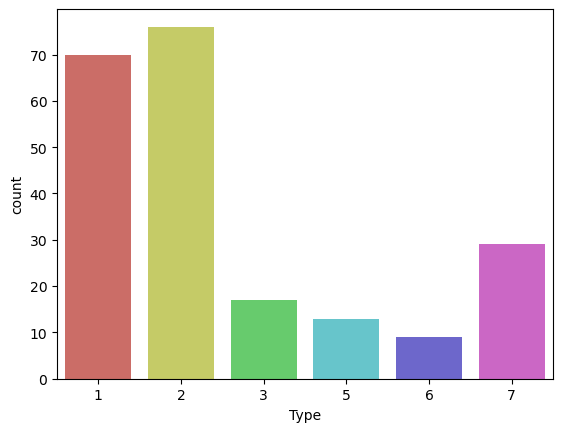

In [58]:
import seaborn as sns

sns.countplot(x="Type",data=glass_data,palette="hls") 

In [59]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import OLSInfluence

In [60]:
# Split data into features and target variable
X = glass_data.drop(columns=['Type'])
y =glass_data['Type']

In [61]:
num_folds = 19
kfold = KFold(n_splits=19)

In [62]:
#num_folds = 19
#kfold = KFold(n_splits=2)

In [63]:
import warnings
warnings.filterwarnings("ignore")


model = KNeighborsClassifier(n_neighbors=1)
model.fit(X,y)
results = cross_val_score(model, X, y, cv=kfold)

In [64]:
print(results.mean())

0.6164274322169059


In [65]:
# Grid Search for Algorithm Tuning
import numpy
from pandas import read_csv
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [66]:
n_neighbors = numpy.array(range(1,50))
param_grid = dict(n_neighbors=n_neighbors)

In [67]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X, y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [68]:
print(grid.best_score_)
print(grid.best_params_)

0.640531561461794
{'n_neighbors': 1}


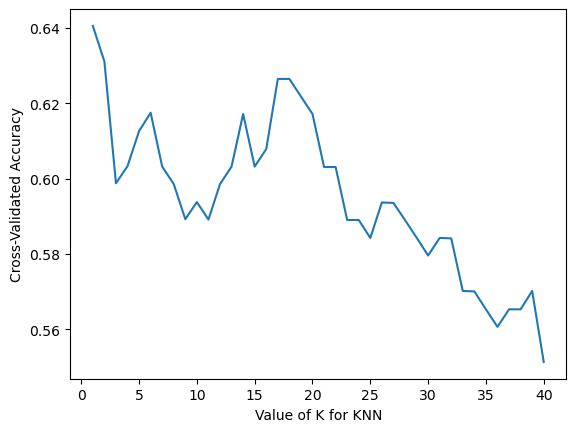

In [69]:
import matplotlib.pyplot as plt 
%matplotlib inline
# choose k between 1 to 41
k_range = range(1, 41)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=5)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()